# *Извлечение именованных сущностей (NER)*
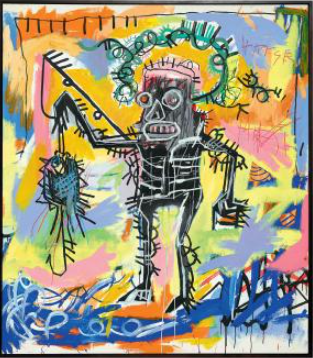

**Картина Jean-Michel Basquiat, продана за 24 млн.долларов в 2012 году.**

------------------------------------------------------------------------------
Я работаю Data Scientist на проекте, который связан с произведениями искусства, продажей, AI прогнозированием стоимости, анализом рынка. На стоимость картины влияет очень много факторов, интерес рынка, популярность, материалы из которых он создан, количество копий этих картин или скульптур. В этом проекте я хочу посмотреть, как с этим может справится нейронная сеть, т.к. текущие методы, пока это только регулярные выражения, не покрывают очень большое количество лотов, что накладывает большую нагрузку на команду, которая правит их в ручную.

---------------------------------------------------------------------------------

## Цель работы:
Создать нейронную сеть, которая будет распознавать и извлекать даты создания предметов арт искусства из описания лота в аукционных домах.

## Задачи работы:
- Исследование предметной области и различных кейсов подачи информации;
- Сбор данных;
- Анализ данных;
- Разметка данных;
- Обучение нейронной сети;
- Анализ результатов.
--------------------------------------------------------------------------------------------------------

# 1.Исследование предметной области

Рассмотрим различные варианты подачи года создания артворков.
1.Аукционный дом **Sothesby's** (пример 1)
-------

https://www.sothebys.com/en/buy/auction/2021/modern-contemporary-art-evening-sale/tete-2

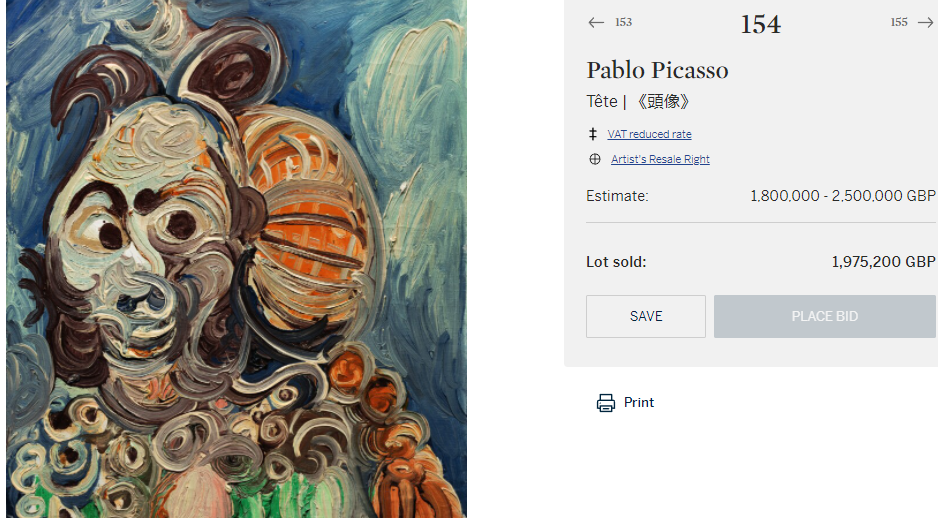
<pre>             
            **Description**
    Property from an Important Private European Collection
Pablo Picasso
1881 - 1973
Tête
dated 27.9.70 and numbered I on the reverse
oil on canvas
65 by 54.5cm., 25⅝ by 21½in.
Painted in Paris on 27th September 1970.
重要歐洲私人收藏
巴布羅・畢加索
1881 - 1973年
《頭像》
款識：藝術家紀年27.9.70並標記I（背面）
油彩畫布
65 x 54.5 公分；25 ⅝ x 21 ½ 英寸
1970年9月27日作於巴黎
    </pre>
----
Видно, что информацию о создании картины (опустим китайский язык), можно взять из строк:
<P>1) dated **27.9.70** and numbered I on the reverse.</P>
<P>2) Painted in Paris on 27th September **1970**. </P>
<P>
Если со второй строкой все понятно, то с первой явная проблема т.к. у нас нет столетия, просто **70** вывести в базу нельзя, т.к. она повлияет на текущие алгоритм МЛ и ДЛ, как следствие неверные расчеты. Для определения номера столетия также будем собирать и года рождения художника, в этом случае, нет очевидных с этим проблем *1881 - 1973*.  </P>
#########################################################################################################################
<P>**!!!!!!Из задачи, сбор просто даты создания произведения искусства, мне также придется извлекать годы жизни артиста, для полноценного определения года создания артворка**</P>

----

2.Аукционный дом **Sothesby's** (пример 2)
-------
https://www.sothebys.com/en/buy/auction/2021/modern-contemporary-art-evening-sale/jockey-2

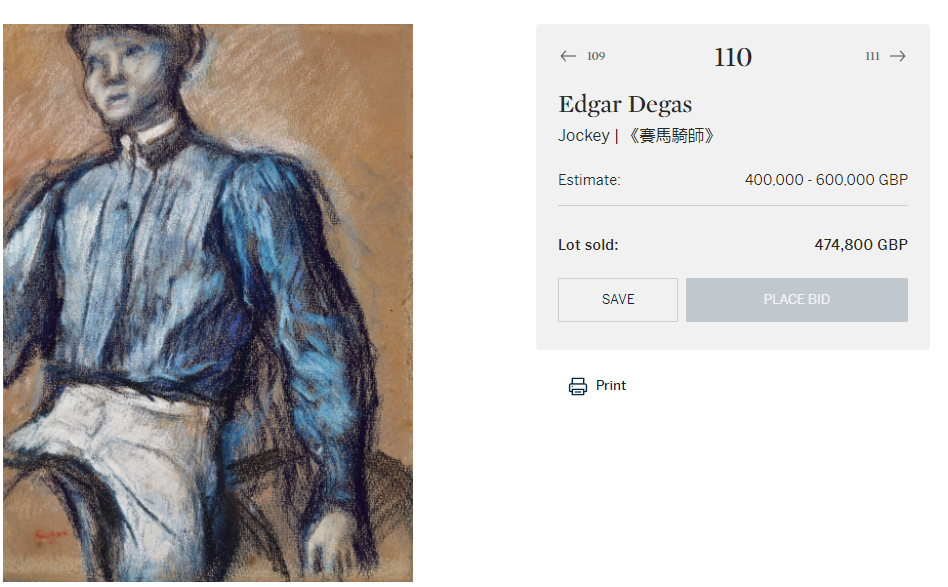

<pre>             
            **Description**
Edgar Degas
1834 - 1917
Jockey
stamped  Degas  (lower left)
pastel and charcoal on paper mounted on board
32.3 by 24m, 12¾ by 9½in.
Executed  circa  1881-85.
    </pre>
----
Информацию о создании можно взять из строки "Executed  circa  1881-85", но когда указан период, то берется год, когда работа была закончена, в этом случае это **85**, проблем не возникнет, т.к. годы жизни также будут взяты из этого описания.

--------------

3.Аукционный дом **Christie's** 
-------
https://onlineonly.christies.com/s/latin-american-art-online/rene-portocarrero-1912-1985-29/142733?ldp_breadcrumb=back

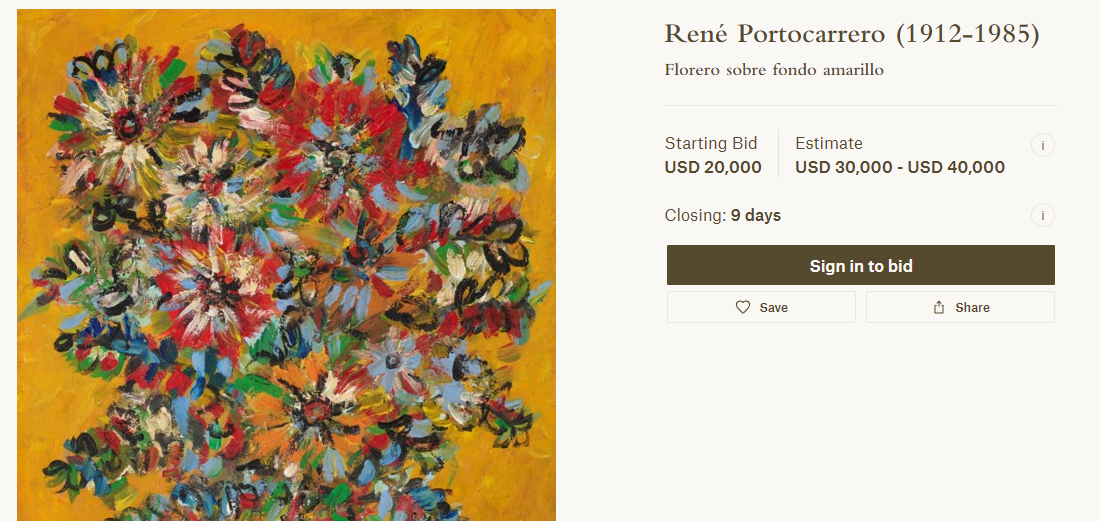

<pre>             
            **Description**
René Portocarrero (1912-1985)
Florero sobre fondo amarillo
signed and dated 'Portocarrero 63' (lower left)
oil on canvas
24 x 193⁄4 in. (61 x 50.2 cm.)
    </pre>
----

4.Аукционный дом **Swann** 
-------
https://catalogue.swanngalleries.com/Lots/auction-lot/ALBRECHT-D%C3%9CRER-The-Martyrdom-of-the-Ten-Thousand?saleno=2460&lotNo=6&refNo=738408

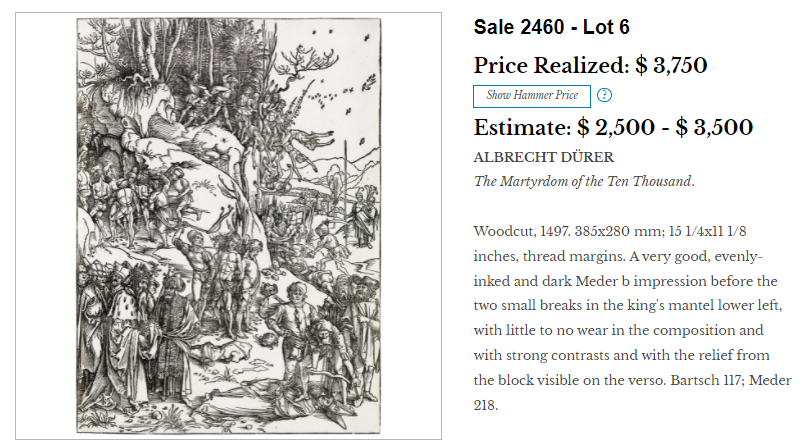

<pre>             
            **Description**
Woodcut, 1497. 385x280 mm; 15 1/4x11 1/8 inches, thread margins. A very good, evenly-inked and dark Meder b impression before the two small breaks in the king's mantel lower left, with little to no wear in the composition and with strong contrasts and with the relief from the block visible on the verso. Bartsch 117; Meder 218.
    </pre>
----

Вывод:
----
<p>1.Видно, что описание артворка для всех аукционов различно, следовательно, необходимо брать случаи из каждого, для разметки и тренировки.</p>
<p>2.Год создания иногда записан в виде только двух цифр, следовательно, необходимо будет собирать года жизни художника, чтобы дополнить столетием.</p>

# 2.Сбор данных

Все данные были получены из внутренней db и записаны в csv (почему нельзя было использовать напрямую сбор для обучения, будет написано ниже), собирались данные о дескрипшене артворка, год жизни художника и год создания предмета искусства.

In [1]:
import pandas as pd

data1 = pd.read_csv('create_year.csv')
data1.sample(5)

,creation_year,born,death,description
2026,1967,1923.0,2004.0,"RICHARD AVEDON (1923-2004)\nVeruschka, Dress b..."
1083,1947,1869.0,1954.0,HENRI MATISSE (1869-1954)\nMartiniquaise: one ...
968,1947,1901.0,1985.0,Jean Dubuffet (1901-1985)\nPonge hilare\nsigné...
2810,1963,1897.0,1976.0,(Pilsen 1897-1976 New York)\n“The strip street...
2503,1900,1863.0,1937.0,"CHARLES HASELWOOD SHANNON, R.A. (BRITISH, 1863..."


# 3.Анализ данных

In [2]:
data1.head()

,creation_year,born,death,description
0,1970,1881.0,1973.0,Property from an Important Private European Co...
1,1944,1898.0,1967.0,René Magritte\n1898 - 1967\nLe civilisateur\ns...
2,50,1881.0,1955.0,Property from a New York Charitable Family Tru...
3,19,1993.0,NaN,Property from an Important American Collection...
4,1921,1877.0,1968.0,Property from the Collection of Ber van der Mo...


In [3]:
print(data1.iloc[3]['description'])

Property from an Important American Collection
Jadé Fadojutimi
b. 1993
I'm pirouetting the night away
signed, titled and dated Jan '19 on the reverse
oil on canvas
145 by 91.1 cm. 57 by 35⅜ in.
重要美國收藏
賈黛・法多朱蒂米
生於1993年
《我用腳尖把夜色旋開》
款識：藝術家簽名、書題目並紀年Jan '19（背面）
油彩畫布
145 x 91.1 公分；57 x 35 ⅜ 英寸


Как видно, из примера выше, существуют ситуации, когда в тексте только последние цифры как в этом примере "19", то в базе у нас естественно уже руками было проставлено 2019. А для разметки данных, для определения маски (где какая сущность), необходимо иметь 19, поэтому такие случаи полностью вычитывались и правились руками.

In [4]:
print(data1.shape)

(3153, 4)


Как видно дата трейн представлен 3153 примерами.

# 4.Разметка данных

На этом этапе я буду использовать предобученный токенайзер "distilbert-base-uncased" от библиотеки transformers.

In [5]:
# Загружаем необходимые библиотеки и сам токенайзер

import pandas as pd
import re
import pandas as pd
import pickle
from transformers import AutoTokenizer
model_checkpoint = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(
    model_checkpoint, padding='max_length', truncation=True, return_offsets_mapping=True)

In [6]:
# если в датасете присутствуют Nan значения, то при процессе разметки падает ошибка
# ноль не имеет значения и не влияет на разметку т.к. не бывает таких годов рождения или создания
# как 0
data1.fillna('0',inplace=True)

Используя токенайзер мы преобразуем данные из description в набор токенов, также нам необходима маска. Т.е. токены которые не явлются сущностями, станут 0, а токены которые мы хотим извлечь станут 1 - год создания предмета искусства, 2 - год рождения автора, 3 - год смерти автора. В маску мы также добавляем служебные обозначения начало и конца текста [-100].

In [7]:
all_data = []
for i in range(data1.shape[0]):
    exm = data1['description'][i][:512]
    cr = data1['creation_year'][i]
    bo = data1['born'][i]
    de = data1['death'][i]
    s1 = exm.split('\n')
    cr = str(cr)
    bo = str(int(bo))
    de = str(int(de))
    data = []
    tokenized_cr = tokenizer(cr)
    token_cr = tokenizer.convert_ids_to_tokens(tokenized_cr["input_ids"])[1:-1]
    tokenized_bo = tokenizer(bo)
    token_bo = tokenizer.convert_ids_to_tokens(tokenized_bo["input_ids"])[1:-1]
    tokenized_de = tokenizer(de)
    token_de = tokenizer.convert_ids_to_tokens(tokenized_de["input_ids"])[1:-1]
    for x in s1:
        tokenizer_x = tokenizer(x)
        token_x = tokenizer.convert_ids_to_tokens(
            tokenizer_x["input_ids"])[1:-1]
        for j in range(len(token_x)):
            if token_x[j] == token_cr[0]:
                data.append(1)
            elif token_x[j] == token_bo[0]:
                data.append(2)
            elif token_x[j] == token_de[0]:
                data.append(3)
            else:
                data.append(0)
    data = [-100]+data+[-100]
    all_data.append(data)
data1['labels'] = all_data

Смысл предыдущего алгоритмы в следующем. Мы токенизировали даты и текст, и проверяем если токен из дескрипшена совпадает с токеном даты создания, то в маску пишем 1, если с годом рождения 2 или 3, если это год смерти. Если не совпадает, то пишем 0.

In [8]:
# результат работы предыдущего алгоритма
data1.head()

,creation_year,born,death,description,labels
0,1970,1881,1973,Property from an Important Private European Co...,"[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, ..."
1,1944,1898,1967,René Magritte\n1898 - 1967\nLe civilisateur\ns...,"[-100, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, ..."
2,50,1881,1955,Property from a New York Charitable Family Tru...,"[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, ..."
3,19,1993,0,Property from an Important American Collection...,"[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1921,1877,1968,Property from the Collection of Ber van der Mo...,"[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
# Рассмотрим подробнее как это работает на примере дескрипшена в первой строке
exp_descr = data1.iloc[0]['description']
print(exp_descr)

Property from an Important Private European Collection
Pablo Picasso
1881 - 1973
Tête
dated 27.9.70 and numbered I on the reverse
oil on canvas
65 by 54.5cm., 25⅝ by 21½in.
Painted in Paris on 27th September 1970.
重要歐洲私人收藏
巴布羅・畢加索
1881 - 1973年
《頭像》
款識：藝術家紀年27.9.70並標記I（背面）
油彩畫布
65 x 54.5 公分；25 ⅝ x 21 ½ 英寸
1970年9月27日作於巴黎


In [10]:
# Переведем это в цифровые токены
token_des = tokenizer(exp_descr)
print(token_des["input_ids"])

[101, 3200, 2013, 2019, 2590, 2797, 2647, 3074, 11623, 22457, 7005, 1011, 3381, 8915, 2618, 6052, 2676, 1012, 1023, 1012, 3963, 1998, 8597, 1045, 2006, 1996, 7901, 3514, 2006, 10683, 3515, 2011, 5139, 1012, 1019, 27487, 1012, 1010, 100, 2011, 2538, 13714, 2378, 1012, 4993, 1999, 3000, 2006, 15045, 2244, 3359, 1012, 100, 100, 100, 100, 100, 1756, 100, 100, 100, 100, 100, 1738, 100, 1779, 100, 7005, 1011, 3381, 1840, 1639, 100, 100, 1640, 100, 100, 1993, 100, 100, 1825, 100, 1840, 2676, 1012, 1023, 1012, 3963, 100, 100, 100, 1045, 1987, 100, 1976, 1988, 100, 100, 100, 100, 3515, 1060, 5139, 1012, 1019, 1772, 1775, 100, 2423, 100, 1060, 2538, 1092, 1941, 100, 3359, 1840, 1023, 1872, 2676, 1864, 100, 100, 100, 100, 102]


In [11]:
# так выглядит токенизация непосредственно слов
token_ma = tokenizer.convert_ids_to_tokens(token_des["input_ids"])
print(token_ma)

['[CLS]', 'property', 'from', 'an', 'important', 'private', 'european', 'collection', 'pablo', 'picasso', '1881', '-', '1973', 'te', '##te', 'dated', '27', '.', '9', '.', '70', 'and', 'numbered', 'i', 'on', 'the', 'reverse', 'oil', 'on', 'canvas', '65', 'by', '54', '.', '5', '##cm', '.', ',', '[UNK]', 'by', '21', '##½', '##in', '.', 'painted', 'in', 'paris', 'on', '27th', 'september', '1970', '.', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '人', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '・', '[UNK]', '加', '[UNK]', '1881', '-', '1973', '年', '《', '[UNK]', '[UNK]', '》', '[UNK]', '[UNK]', '：', '[UNK]', '[UNK]', '家', '[UNK]', '年', '27', '.', '9', '.', '70', '[UNK]', '[UNK]', '[UNK]', 'i', '（', '[UNK]', '面', '）', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '65', 'x', '54', '.', '5', '公', '分', '[UNK]', '25', '[UNK]', 'x', '21', '½', '英', '[UNK]', '1970', '年', '9', '月', '27', '日', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[SEP]']


In [12]:
# посмотрим на маску, для этого description
print(data1.iloc[0]['labels'])

[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100]


Получилось то, что и планировалось. Начало и конец текста имеет -100, где токен соответствует году создания - 1, году рождения - 2, году смерти -3. Во всех остальных случаях, мы получили 0.

In [13]:
# сохраним текст и соответстующие его маски в json файл, чтобы с этого файла подгрузить данные для тренировки
data1[['description','labels']].to_json('cr_year.json', orient='records', lines=True)